In [100]:
import pandas as pd
from glob import glob

In [101]:
generators = ['cg', 'ctgan', 'gc', 'tvaes']
list_df = []

for i in generators:
    files = glob(f'../results/{i}/predictors*.xlsx')
    df = pd.concat(pd.read_excel(excel_file) for excel_file in files)
    df['generator'] = i
    df['type'] = df['model'].apply(lambda x: x.split('_')[0])
    list_df.append(df)

In [102]:
metrics = [
    'type', 'generator', 'roc_auc', 'accuracy', 'balanced_accuracy', 'recall',
    'score_test', 'f1', 'f1_macro', 'f1_micro'
]
sort_metrics = metrics[2:]

In [103]:
# Revisar 'fit_time', 'memory_size',     'log_loss' en otros gráficos

Obtener los mejores 10 algoritmos

In [104]:
list_best = []
for df in list_df:
    best_types = df[df['roc_auc'].notnull()].sort_values(['roc_auc', 'accuracy'], ascending=False).groupby('type').head(1).head(5)['type'].tolist()
    best_models = (
        df[df["type"].isin(best_types)]
        .dropna(subset=["roc_auc"])  # Eliminar valores nulos en roc_auc
        .sort_values(["roc_auc", "accuracy"], ascending=False)
        .groupby("type")
        .head(10)
    )
    list_best.append(best_models)

In [105]:
result_df = pd.concat(list_best, ignore_index=True)

In [106]:
result_df.sort_values(sort_metrics, ascending=False)[metrics]

,type,generator,roc_auc,accuracy,balanced_accuracy,recall,score_test,f1,f1_macro,f1_micro
150,NeuralNetTorch,tvaes,1.000000,0.950,0.966667,1.0,1.000000,0.909091,0.937304,0.950
151,NeuralNetTorch,tvaes,0.993333,0.750,0.833333,1.0,0.993333,0.666667,0.733333,0.750
152,NeuralNetTorch,tvaes,0.993333,0.925,0.916667,0.9,0.993333,0.857143,0.903148,0.925
154,NeuralNetFastAI,tvaes,0.993333,0.925,0.950000,1.0,0.993333,0.869565,0.908467,0.925
153,NeuralNetFastAI,tvaes,0.993333,0.925,0.916667,0.9,0.993333,0.857143,0.903148,0.925
...,...,...,...,...,...,...,...,...,...,...
95,WeightedEnsemble,ctgan,0.846667,0.700,0.766667,0.9,0.846667,0.600000,0.680000,0.700
96,WeightedEnsemble,ctgan,0.843333,0.675,0.716667,0.8,0.843333,0.551724,0.648411,0.675
97,WeightedEnsemble,ctgan,0.836667,0.625,0.683333,0.8,0.836667,0.516129,0.605003,0.625
98,WeightedEnsemble,ctgan,0.816667,0.725,0.683333,0.6,0.816667,0.521739,0.664378,0.725


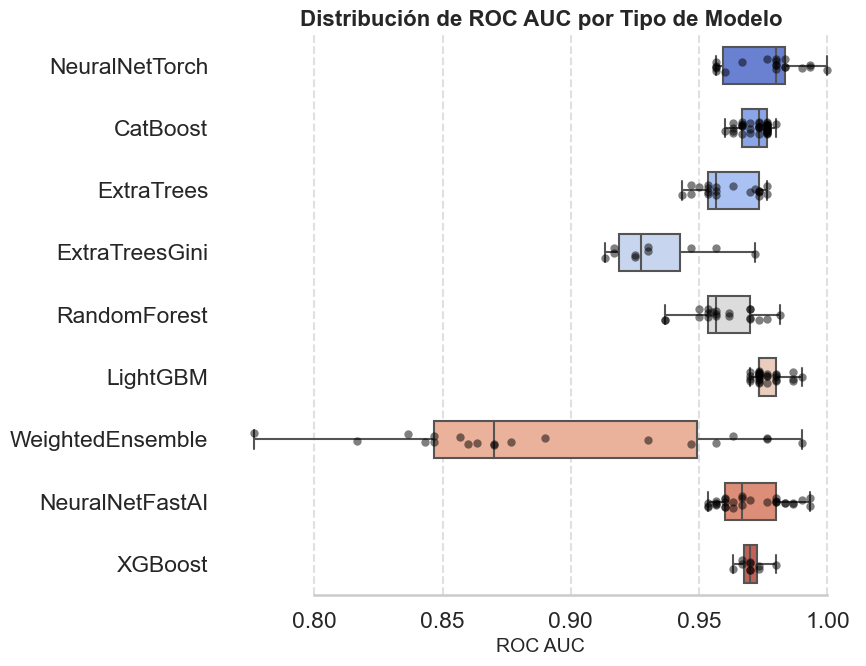

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo mejorado para visualización clara
sns.set_theme(style="whitegrid", context="talk", palette="deep")

# Inicializar la figura
fig, ax = plt.subplots(figsize=(9, 7))

# Gráfico de caja con mejor visibilidad
sns.boxplot(
    data=result_df, x="roc_auc", y="type", hue="type",
    whis=[0, 100], width=0.6, palette="coolwarm", 
    linewidth=1.5, fliersize=0  # Ocultar outliers ya que se mostrarán con stripplot
)

# Agregar puntos individuales para cada observación
sns.stripplot(
    data=result_df, x="roc_auc", y="type", size=6, 
    color="black", alpha=0.5, jitter=True  # Mejor dispersión y visibilidad
)

# Personalización del gráfico
ax.set_title("Distribución de ROC AUC por Tipo de Modelo", fontsize=16, fontweight="bold")
ax.set_xlabel("ROC AUC", fontsize=14)
ax.set_ylabel("")  # Se mantiene vacío para claridad
ax.xaxis.grid(True, linestyle="--", alpha=0.6)  # Líneas de cuadrícula más sutiles

# Ampliar el eje X hasta 1

# Despinar para un diseño más limpio
sns.despine(trim=True, left=True)

# Ajustar automáticamente el diseño para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


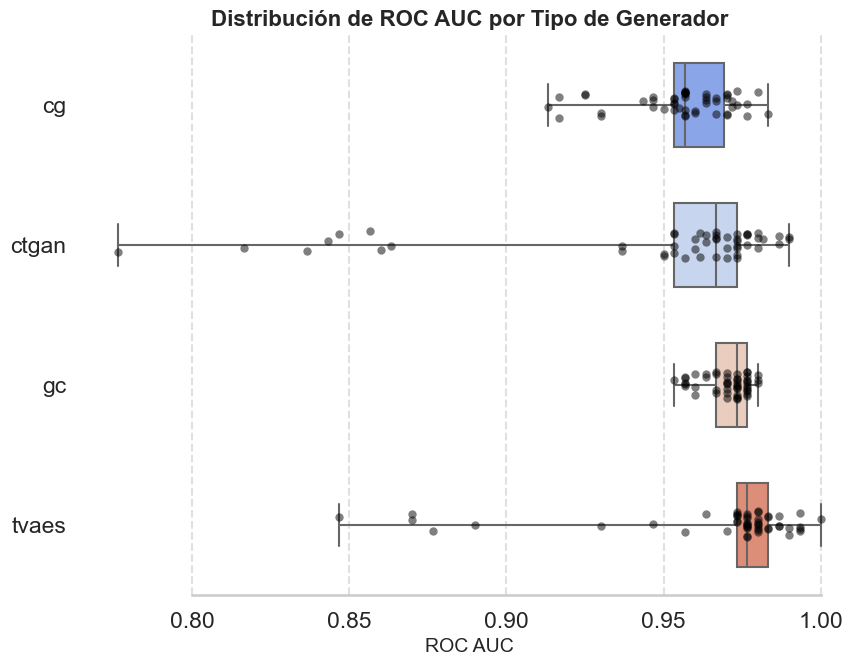

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo mejorado para visualización clara
sns.set_theme(style="whitegrid", context="talk", palette="deep")

# Inicializar la figura
fig, ax = plt.subplots(figsize=(9, 7))

# Gráfico de caja con mejor visibilidad
sns.boxplot(
    data=result_df, x="roc_auc", y="generator", hue="generator",
    whis=[0, 100], width=0.6, palette="coolwarm", 
    linewidth=1.5, fliersize=0  # Ocultar outliers ya que se mostrarán con stripplot
)

# Agregar puntos individuales para cada observación
sns.stripplot(
    data=result_df, x="roc_auc", y="generator", size=6, 
    color="black", alpha=0.5, jitter=True  # Mejor dispersión y visibilidad
)

# Personalización del gráfico
ax.set_title("Distribución de ROC AUC por Tipo de Generador", fontsize=16, fontweight="bold")
ax.set_xlabel("ROC AUC", fontsize=14)
ax.set_ylabel("")  # Se mantiene vacío para claridad
ax.xaxis.grid(True, linestyle="--", alpha=0.6)  # Líneas de cuadrícula más sutiles

# Ampliar el eje X hasta 1

# Despinar para un diseño más limpio
sns.despine(trim=True, left=True)

# Ajustar automáticamente el diseño para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


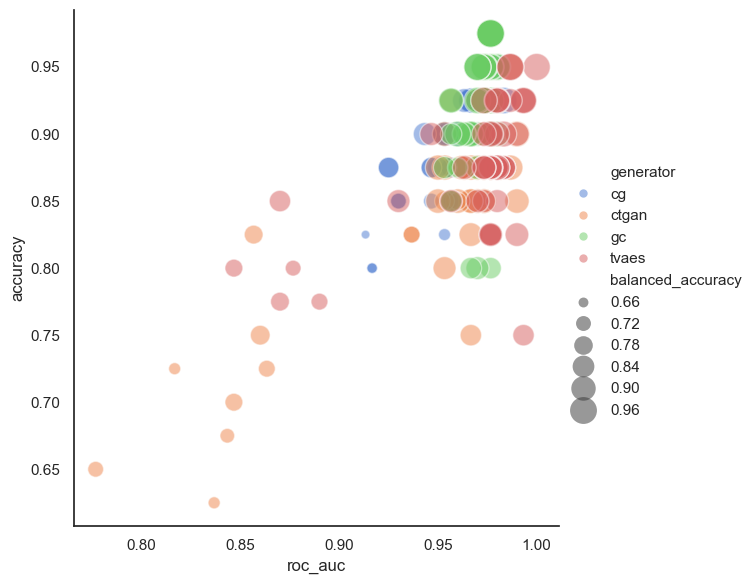

In [109]:
import seaborn as sns
sns.set_theme(style="white")

# Load the example mpg dataset

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="roc_auc", y="accuracy", hue="generator", size="balanced_accuracy",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=result_df)

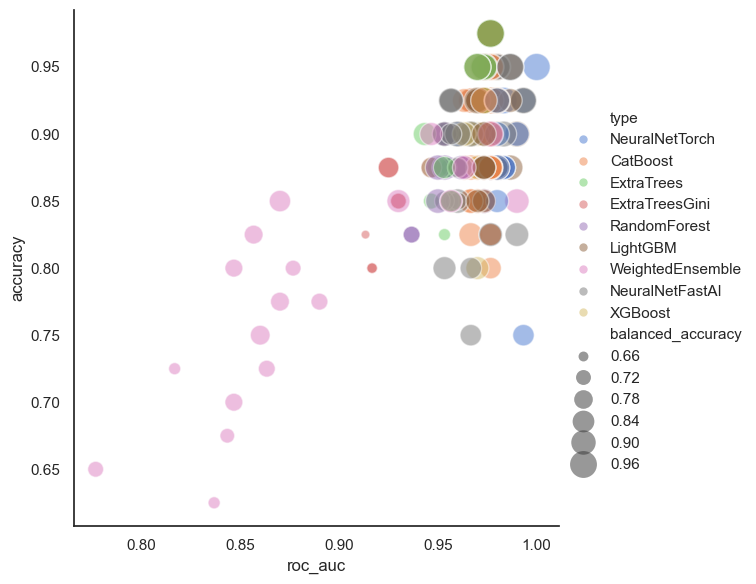

In [110]:
import seaborn as sns
sns.set_theme(style="white")

# Load the example mpg dataset

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="roc_auc", y="accuracy", hue="type", size="balanced_accuracy",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=result_df)

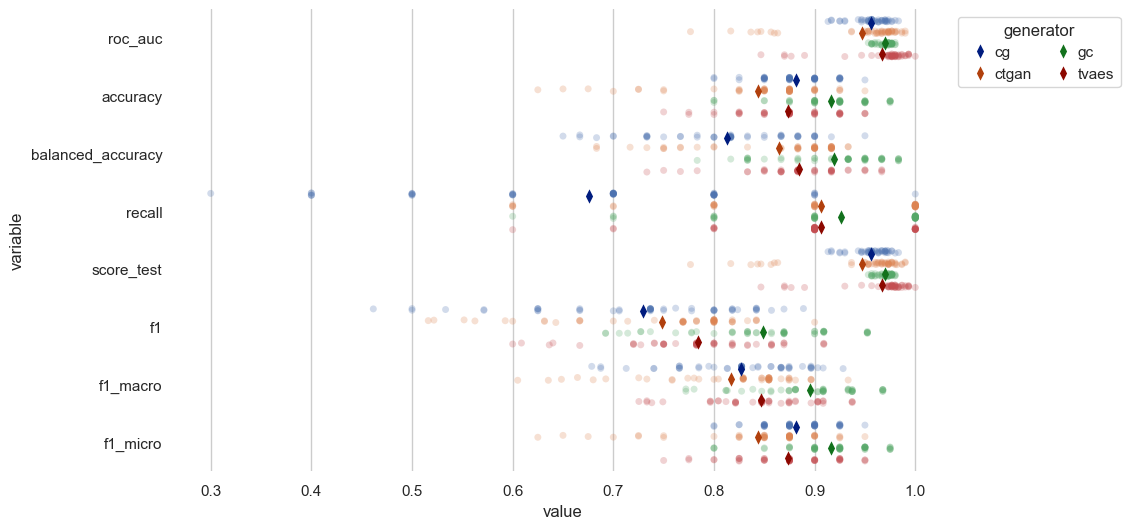

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# "Melt" the dataset to "long-form" or "tidy" representation
iris = result_df.melt(id_vars="generator", value_vars=sort_metrics)

# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(
    data=iris, x="value", y="variable", hue="generator",
    dodge=True, alpha=.25, zorder=1, legend=False,
)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
sns.pointplot(
    data=iris, x="value", y="variable", hue="generator",
    dodge=.8 - .8 / 3, palette="dark", errorbar=None,
    markers="d", markersize=4, linestyle="none",
)

# Improve the legend
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), ncol=2, frameon=True, columnspacing=1, handletextpad=0)


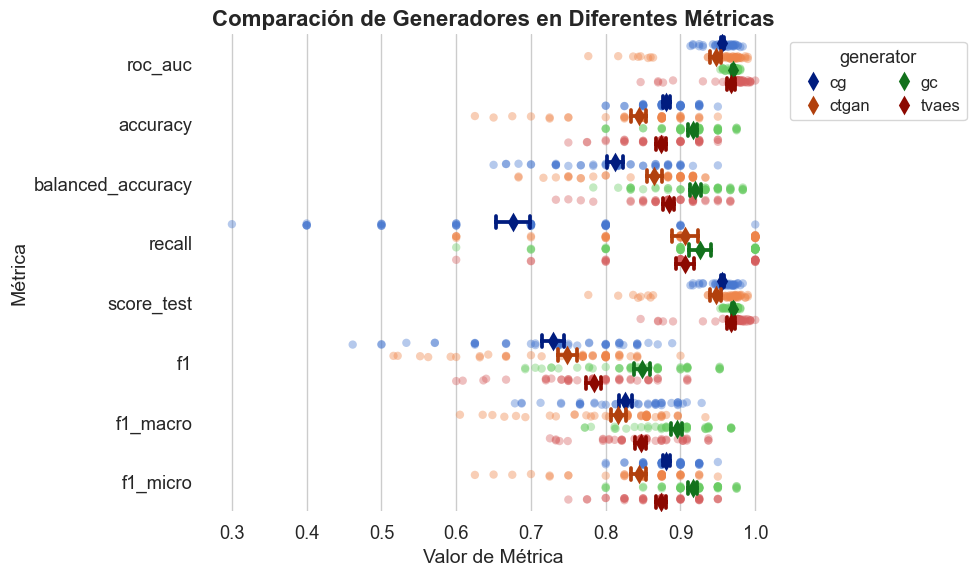

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo para una presentación clara y científica
sns.set_theme(style="whitegrid", font_scale=1.2, rc={"figure.figsize": (10, 6)})

# "Melt" el dataset a formato largo
iris = result_df.melt(id_vars="generator", value_vars=sort_metrics)

# Inicializar la figura
fig, ax = plt.subplots(figsize=(10, 6))
sns.despine(bottom=True, left=True)

# Visualización con scatter plot para datos individuales
sns.stripplot(
    data=iris, x="value", y="variable", hue="generator",
    dodge=True, alpha=0.4, zorder=1, legend=False,
    size=6, palette="muted"
)

# Visualización con pointplot para mostrar promedios
sns.pointplot(
    data=iris, x="value", y="variable", hue="generator",
    dodge=0.7, palette="dark", errorbar="se",
    markers="d", markersize=7, linestyle="none", capsize=0.2
)

# Personalizar etiquetas de los ejes
ax.set_xlabel("Valor de Métrica", fontsize=14)
ax.set_ylabel("Métrica", fontsize=14)
ax.set_title("Comparación de Generadores en Diferentes Métricas", fontsize=16, fontweight="bold")

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), 
                ncol=2, frameon=True, columnspacing=1, handletextpad=0,
                fontsize=12, title_fontsize=13
                )


# Ajustar el diseño
plt.tight_layout()

# Mostrar la figura
plt.show()


#### Importancia de variables

In [87]:
list_df = []

for i in generators:
    files = glob(f'../results/{i}/feature_importance*.xlsx')
    df = pd.concat(pd.read_excel(excel_file) for excel_file in files)
    df['generator'] = i
    df.rename(columns={'Unnamed: 0': 'feature'}, inplace=True)
    list_df.append(df)

In [88]:
features_list = []
for df in list_df:
    best_features = (
        df[df['p_value'] < 0.05]
    )
    features_list.append(best_features)

In [89]:
features_list[0]

,feature,importance,stddev,p_value,n,p99_high,p99_low,generator
0,eval-TLP-Tavec-29_RCl_Cp_frente_RCl_LP-PD,0.004103,0.000842,0.000201,5,0.005836,0.002369,cg
1,eval-TLP-Stroop-palabrasColor-PD,0.002667,0.001207,0.003905,5,0.005153,0.000182,cg
2,eval-TLP-Tavec-27_RI_B_frente_RI_A1-PD,0.002438,0.000451,0.000134,5,0.003366,0.001510,cg
3,eval-TLP-Stroop-palabras-PD,0.002030,0.000644,0.001067,5,0.003356,0.000704,cg
4,eval-TLP-Tavec-11_RCl_LP-PD,0.001733,0.000419,0.000381,5,0.002596,0.000870,cg
...,...,...,...,...,...,...,...,...
64,clin-reservaCognitiva_cursos,0.000038,0.000018,0.004290,5,0.000075,0.000002,cg
69,demo-genero,0.000030,0.000012,0.002318,5,0.000054,0.000006,cg
71,clin-Covid_sintomaCansancio,0.000025,0.000018,0.016339,5,0.000062,-0.000011,cg
79,ques-MMSE-concentracion-PD,0.000017,0.000009,0.008065,5,0.000037,-0.000003,cg


In [90]:
result_features = pd.concat(features_list, ignore_index=True)

In [128]:
features_count = result_features.groupby('feature')['feature'].count().sort_values(ascending=False)

C:\Users\jgala\AppData\Local\Temp\ipykernel_19696\1176038155.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features_count.values, y=features_count.index, palette="viridis")


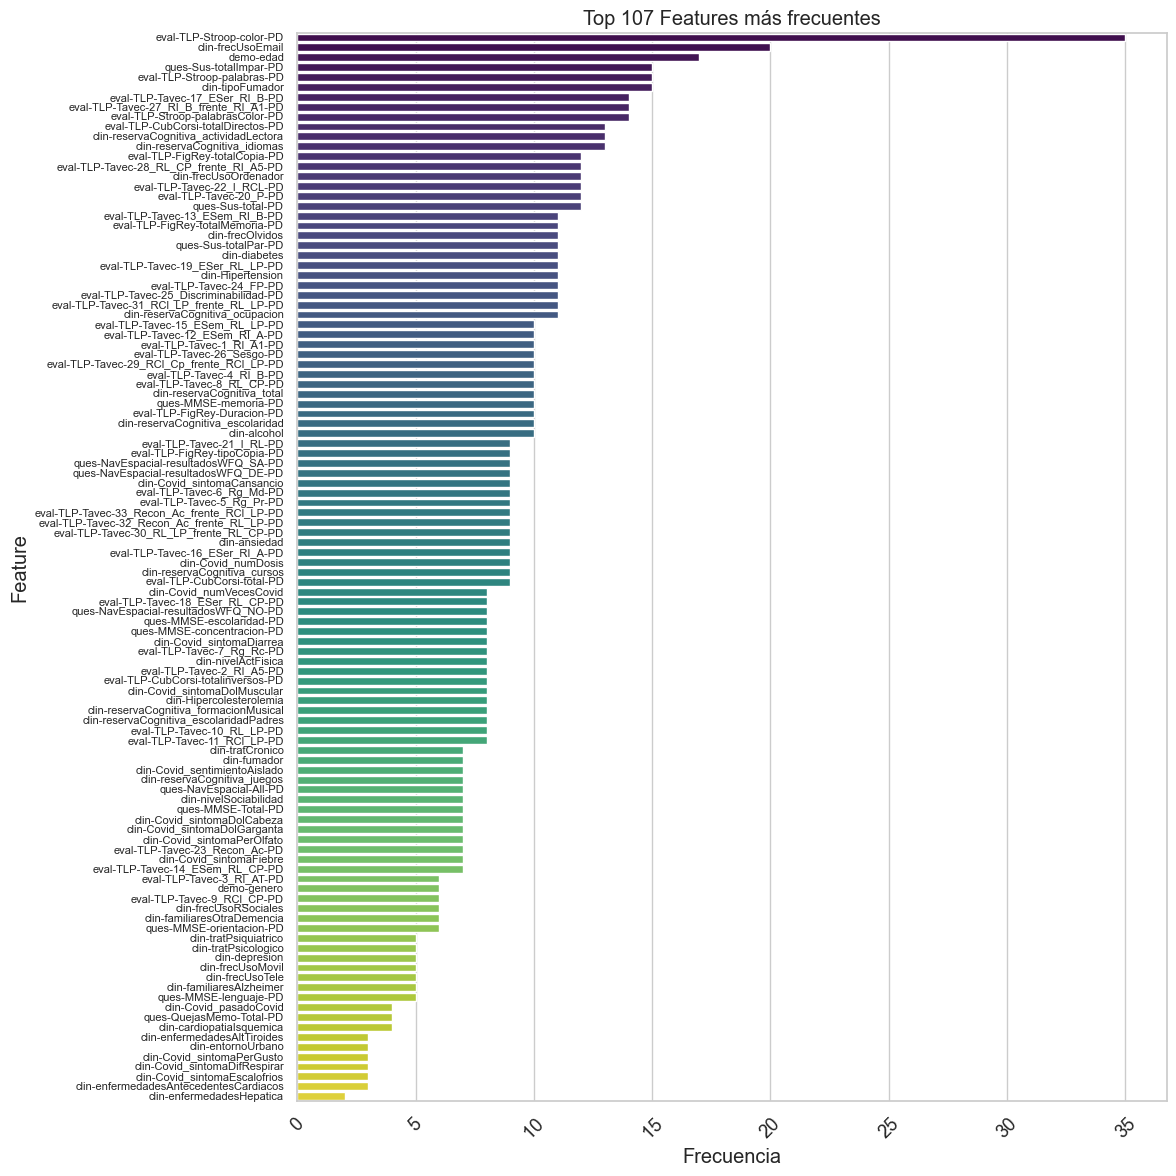

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que features_count ya ha sido calculado
plt.figure(figsize=(12, 12))  # Aumenta el tamaño para acomodar más etiquetas
sns.barplot(x=features_count.values, y=features_count.index, palette="viridis")

plt.xlabel("Frecuencia")
plt.ylabel("Feature")
plt.title("Top 107 Features más frecuentes")
plt.xticks(rotation=45)  # Rotar las etiquetas para mejor visualización
plt.gca().set_yticks(plt.gca().get_yticks())
plt.gca().set_yticklabels(plt.gca().get_yticklabels(), va='center', fontsize=8)
plt.tight_layout()  # Ajusta automáticamente los márgenes
plt.show()
